In [69]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas

In [70]:
data_info = pandas.read_csv("NUSW-NB15_features.csv", encoding = "ISO-8859-1", header=None).values
features = data_info[:]
feature_names = features[:, 1]  # Names of the features in a list

 

In [71]:
dataframe1 = pandas.read_csv("UNSW.csv"       , names = feature_names, encoding = "ISO-8859-1", header=None)
dataframe2 = pandas.read_csv("UNSW-NB15_2.csv", names = feature_names, encoding = "ISO-8859-1",header=None)
dataframe3 = pandas.read_csv("UNSW-NB15_3.csv", names = feature_names,   encoding = "ISO-8859-1",header=None)
dataframe4 = pandas.read_csv("UNSW-NB15_4.csv",  names = feature_names,  encoding = "ISO-8859-1",header=None)

In [72]:
#concat datasets

dataframe = pandas.concat([dataframe1, dataframe2, dataframe3, dataframe4])

del dataframe1
del dataframe2
del dataframe3
del dataframe4

In [73]:

dataframe['attack_cat'] = dataframe['attack_cat'].replace(np.nan, 'Normal', regex=True)
dataframe.fillna(0, inplace=True)

In [74]:
dataframe[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,1,srcip,nominal,Source IP address,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0
1,2,sport,integer,Source port number,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0
2,3,dstip,nominal,Destination IP address,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0
3,4,dsport,integer,Destination port number,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0
4,5,proto,nominal,Transaction protocol,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0


In [77]:
#TURN CATEGORICAL DATA INTO DUMMY VARIABLES 

dummies_1= pd.get_dummies(dataframe['proto'])#
dummies_2 = pd.get_dummies(dataframe['state'])
dummies_3 = pd.get_dummies(dataframe['srcip'])
dummies_4 = pd.get_dummies(dataframe['dstip'])
#dummies_5 = pd.get_dummies(df['sport'])
#dummies_6 = pd.get_dummies(df['dsport'])
dummies_5 = pd.get_dummies(dataframe['service'])
dummies_6 = pd.get_dummies(dataframe['ct_ftp_cmd'])


merged = pandas.concat([dataframe, dummies_1], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged.drop(['zero'], axis = 1)
###


In [79]:
merged_1= pandas.concat([dataframe, dummies_2], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column 

x = merged_1.drop(['no'], axis = 1)


In [80]:
merged_2 = pandas.concat([dataframe, dummies_3], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_2.drop(['59.166.0.9'], axis = 1)
###

In [81]:
merged_3 = pandas.concat([dataframe, dummies_4], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_3.drop(['59.166.0.9'], axis = 1)
##

In [83]:
###
merged_4 = pandas.concat([dataframe, dummies_5], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_4.drop(['ssl'], axis = 1)
##

In [84]:
###
merged_5 = pandas.concat([dataframe, dummies_6], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_5.drop(['4'], axis = 1)
##

In [86]:
#drop categorical features as they are now encoded

x = df.drop(['proto', 'state', 'srcip', 'dstip', 'service', 'ct_ftp_cmd', 'sport', 'dsport'], axis = 1)


#merge into df 

df = x

df

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,attack_cat,Label,0,1,2,4,,0,1,2
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,Normal,0.0,1,0,0,0,0,0,0,0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,Normal,0.0,1,0,0,0,0,0,0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,Normal,0.0,1,0,0,0,0,0,0,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,Normal,0.0,1,0,0,0,0,0,0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,Normal,0.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,0.087306,320.0,1828.0,31.0,29.0,1.0,2.0,24465.671880,146610.765600,6.0,...,Normal,0.0,0,0,0,0,1,0,0,0
440040,0.365058,456.0,346.0,31.0,29.0,2.0,2.0,8743.816406,6333.240234,8.0,...,Normal,0.0,0,0,0,0,0,0,0,1
440041,6.335154,1802.0,2088.0,31.0,29.0,7.0,9.0,2204.839844,2549.582764,32.0,...,Normal,0.0,0,0,0,0,0,0,0,1
440042,2.200934,3498.0,166054.0,31.0,29.0,2.0,57.0,12496.513670,598375.062500,58.0,...,Normal,0.0,0,0,0,0,1,0,0,0


In [87]:
x = df.drop(['attack_cat','Label'], axis = 1)
y = df[['attack_cat']]

In [90]:
###scale data between 0 and 1 
## with 1 = standard deviation and mean = 0 

# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_dst_sport_ltm,ct_dst_src_ltm,0,1,2,4,,0,1,2
0,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.630162,-0.677665,1.992636,-0.060066,-0.005989,-0.001474,-1.866996,-0.074509,-0.112481,-0.004038
1,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.630162,-0.677665,1.992636,-0.060066,-0.005989,-0.001474,-1.866996,-0.074509,-0.112481,-0.004038
2,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.630162,-0.677665,1.992636,-0.060066,-0.005989,-0.001474,-1.866996,-0.074509,-0.112481,-0.004038
3,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.630162,-0.677665,1.992636,-0.060066,-0.005989,-0.001474,-1.866996,-0.074509,-0.112481,-0.004038
4,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.630162,-0.677665,1.992636,-0.060066,-0.005989,-0.001474,-1.866996,-0.074509,-0.112481,-0.004038


In [291]:
#drop as column is now encoded
x = x.drop(['srcip','sport','dstip','dsport', 'proto','state'], axis = 1)

In [91]:
#Turned Malicsious into True, Normal into false

y['Target'] = y['attack_cat'] != 'Normal'
y = y.drop('attack_cat', axis=1)

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
y[0:5]

,Target
0,False
1,False
2,False
3,False
4,False


In [94]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['Target'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]


In [95]:
#Perform PCA to reduce dimensionality of feature vector for better accuracy
#reduce from 37 to 2 dimensional space

pca=PCA(n_components = 2)
pca.fit(x)
x_scaled = pca.transform(x)
print ("Original Shape:   ", x.shape)
print ("Transformed Shape:",x_scaled.shape)

x = x_scaled

print(x)

Original Shape:    (1840095, 47)
Transformed Shape: (1840095, 2)
[[ 6.67191794 -6.86162349]
 [ 6.67191794 -6.86162349]
 [ 6.67191794 -6.86162349]
 ...
 [ 2.20183956 -1.40487252]
 [ 3.54425721  2.42222091]
 [ 1.94947819 -1.61873264]]


In [96]:
#Split into test and training sets. 25% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [97]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288066, 2)
(552029, 2)
(1288066, 2)
(552029, 2)


In [99]:
from keras.layers import Dropout
from keras import initializers
from keras.optimizers import Adam

# Create Neural Network, with 4 hidden layers and 2 output layers being subjected to the softmax probability function
# and 2 input layers which was reduced by PCA

model = Sequential()

model.add(Dense(200, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1), bias_initializer = initializers.Constant(0.2)))
model.add(Dropout(0.3))
model.add(Dense(180, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.2), )) 
model.add(Dropout(0.3))
model.add(Dense(120, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.2), ))
model.add(Dropout(0.3))
model.add(Dense(60, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.2), ))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1],activation='softmax')) #takes in an input and spits out 1D vector

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999)

#Add in hyper parameters
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer )
#Early stopping used to stop model from over or under fitting - stops when accuracy is no longer improving 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=3, mode='auto', restore_best_weights=False, baseline=None)
#Fit the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

Train on 1288066 samples, validate on 552029 samples
Epoch 1/100
1288066/1288066 [==============================] - 91s 70us/step - loss: 0.2871 - acc: 0.8575 - val_loss: 0.2316 - val_acc: 0.8681
Epoch 2/100
1288066/1288066 [==============================] - 89s 69us/step - loss: 0.2161 - acc: 0.8970 - val_loss: 0.2560 - val_acc: 0.9130
Epoch 3/100
1288066/1288066 [==============================] - 87s 68us/step - loss: 0.1179 - acc: 0.9581 - val_loss: 0.0828 - val_acc: 0.9700
Epoch 4/100
1288066/1288066 [==============================] - 88s 68us/step - loss: 0.0876 - acc: 0.9701 - val_loss: 0.0755 - val_acc: 0.9736
Epoch 5/100
1288066/1288066 [==============================] - 88s 69us/step - loss: 0.0791 - acc: 0.9727 - val_loss: 0.0723 - val_acc: 0.9744
Epoch 6/100
1288066/1288066 [==============================] - 88s 68us/step - loss: 0.0754 - acc: 0.9736 - val_loss: 0.0698 - val_acc: 0.9744
Epoch 7/100
1288066/1288066 [==============================] - 88s 68us/step - loss: 0.07

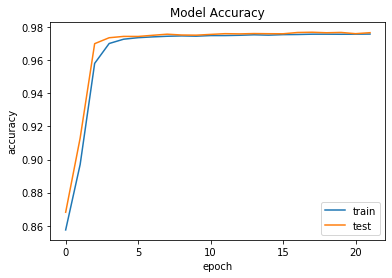

In [101]:
# plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

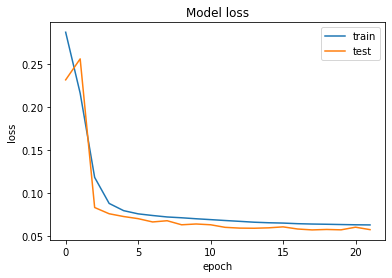

In [113]:
# plot training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [114]:
cm

array([[457941,   4133],
       [  8750,  81205]])

In [115]:
# Measure accuracy
predictors = model.predict(x_test)
predictors = np.argmax(predictors,axis=1)
prediction = np.argmax(y_test,axis=1)

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction, predictors)

In [117]:
cm

array([[457941,   4133],
       [  8750,  81205]])

In [118]:
#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 457941
FP = 4133
FN = 8750
TN = 81205

In [119]:

Acc = ((TP + TN)/(TP + TN + FP + FN))

print("Accuracy: ", Acc * 100, '%')

Accuracy:  97.66624579505788 %


In [120]:
# Recall 

Recall = ((TP)/(TP + FN))

print("Recall", Recall * 100, '%')

Recall 98.12509776275952 %


In [121]:
# Precision

Precision = ((TP)/(TP+FP))

print("Precision", Precision * 100, '%')

Precision 99.10555452157014 %


In [122]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [123]:
#weights associated with each connect neuron 

weights

array([[-2.23416865e-01,  1.86089307e-01,  1.93713635e-01,
         2.89849371e-01, -3.35085869e-01, -1.16305649e-01,
         7.91673481e-01,  2.98349977e-01,  5.39230525e-01,
        -2.99320489e-01, -5.31074107e-01, -4.52272236e-01,
         8.67294252e-01,  1.11351267e-01,  2.50523120e-01,
         1.04787096e-01, -5.13669550e-01,  3.34080368e-01,
        -2.38416359e-01,  8.61944407e-02,  1.07579100e+00,
         1.52379429e+00,  2.06678882e-01, -1.32492229e-01,
         1.39819694e+00,  1.47444439e+00, -7.46459365e-01,
        -7.24200189e-01, -4.09637779e-01,  1.39138377e+00,
        -2.11623684e-01,  6.45254672e-01,  5.16545057e-01,
         7.72893608e-01,  1.40058744e+00,  2.38570547e+00,
         3.54444712e-01, -3.76911461e-01, -3.26327205e-01,
         1.75678110e+00, -8.66586119e-02,  1.66924334e+00,
        -5.54595627e-02, -3.81306082e-01,  2.10241556e-01,
         1.74200207e-01,  4.62401569e-01,  2.00726485e+00,
         1.66222703e+00,  4.73508462e-02, -3.16620499e-0

In [124]:
#bias for each connected neuron

biases

array([-0.42026818,  0.64924824,  0.61035997,  1.0080079 , -0.7108183 ,
       -0.31469673, -2.2284126 ,  1.0446005 , -0.720723  , -1.3837231 ,
       -1.405336  , -0.1971151 ,  0.04194292, -0.27284572,  0.8844004 ,
       -0.24497871, -1.3115951 ,  0.61309534,  0.7845456 ,  0.3095443 ,
        0.3018497 , -1.9209166 , -1.0423203 , -0.5187165 , -0.9333169 ,
       -1.4172649 ,  0.1724526 ,  0.00473043, -1.1652704 , -0.66528225,
       -0.6067868 , -1.7051027 , -1.3714418 , -0.12546404, -2.1330898 ,
       -0.9890764 ,  1.2344333 , -0.70638776, -1.2219931 ,  0.6588364 ,
       -0.2922816 , -1.4645782 , -0.8616228 , -0.89072365,  0.739484  ,
       -0.85958236, -0.9783861 , -0.01963388, -0.9814944 ,  0.33043453,
       -0.98625505, -0.6103436 , -0.52004415,  0.7304786 ,  0.9402467 ,
        0.9297467 , -0.8911751 ,  0.06985528, -0.63498557,  0.00845476,
       -0.77517503, -0.7096707 , -0.00408026, -1.4958062 ,  0.02429253,
        0.01830334, -0.7869801 ,  0.75982153, -0.93305075,  0.02